In [1]:
import numpy as np
import matplotlib.pyplot as plt

a = 0.6 #z平面上の円の半径
V = 1.0 #一様流速度
deg = np.pi/180
alp = 5*deg #迎角
beta = 20*deg
c = 0.5

gamma = 4*np.pi*V*a*np.sin(alp+beta) #Kuttaの条件
print("gamma:",gamma)
Z_c = a*np.exp(1j*(np.pi - beta)) + c
cgamma = (1j*gamma)/(2*np.pi)
n = 800
m = 181
dr = 0.005
dtheta = (360/(m-1))*deg
x = np.zeros((n,m))
y = np.zeros((n,m))
Xksi = np.zeros((n,m))
Yksi = np.zeros((n,m))
streamlinematrix = np.zeros((n,m))
potentialmatrix = np.zeros((n,m))
pressurematrix = np.zeros((n,m))

def potential(z):
  return V*(z+a**2/z)+cgamma*np.log(z)

def Z(z):
  return z*np.exp(1j*alp)+Z_c

def ksi(Z):
  return Z + c**2/Z

def dfdksi(z):
  return V*np.exp(-1j*alp)*(1-a**2/z**2+1j*4*np.pi*a*np.sin(alp+beta)/(2*np.pi*z))/(1-c**2/Z(z)**2)

def pressure(z):
  return 1-abs(dfdksi(z))**2/V**2

for i in range(n):
  for k in range(m):
    theta0 = 0
    theta = theta0 + k*dtheta
    r = a + i*dr
    x[i,k] = r*np.cos(theta)
    y[i,k] = r*np.sin(theta)
    z = x[i,k] + 1j*y[i,k]
    potentialmatrix[i,k] = np.real(potential(z))
    streamlinematrix[i,k] = np.imag(potential(z))
    pressurematrix[i,k] = pressure(z)
    Xksi[i,k] = np.real(ksi(Z(z)))
    Yksi[i,k] = np.imag(ksi(Z(z)))

gamma: 3.1864666232579273


Text(0.5, 1.0, 'Wing Shape')

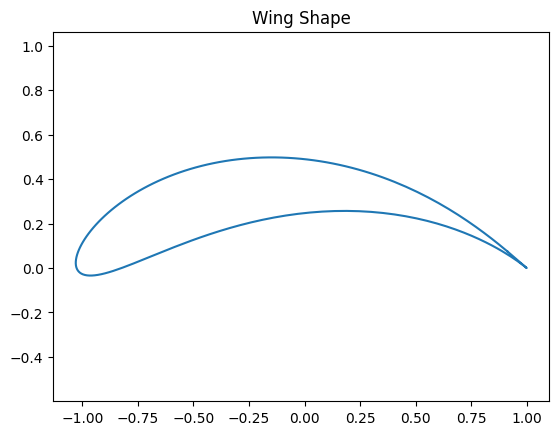

In [2]:
#翼形状
#翼平面はz平面の円の表面だから上のイタレーションでi=0とした
WingX = Xksi[0,:]
WingY = Yksi[0,:]
plt.plot(WingX,WingY)
plt.axis('equal')
plt.title("Wing Shape")

<ipython-input-3-dbb84fe6d109>:7: UserWarning: The following kwargs were not used by contour: 'linstyle'
  plt.contour(Xksi,Yksi,streamlinematrix,121,linstyle="-",cmap='gray')


(-2.0, 2.0)

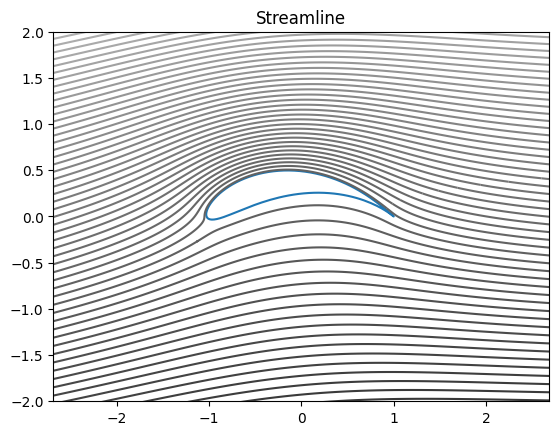

In [ ]:
#流線
WingX = Xksi[0,:]
WingY = Yksi[0,:]
plt.plot(WingX,WingY)
plt.axis('equal')
plt.title("流線")
plt.contour(Xksi,Yksi,streamlinematrix,121,linstyle="-",cmap='gray')
#plt.colorbar()
plt.xlim(-2,2)
plt.ylim(-2,2)

<ipython-input-7-dbe9b5c15228>:8: UserWarning: The following kwargs were not used by contour: 'linstyle'
  plt.contour(Xksi,Yksi,pressurematrix,30,linstyle="-",cmap='bwr_r',vmax=3,vmin=-3)


(-2.0, 2.0)

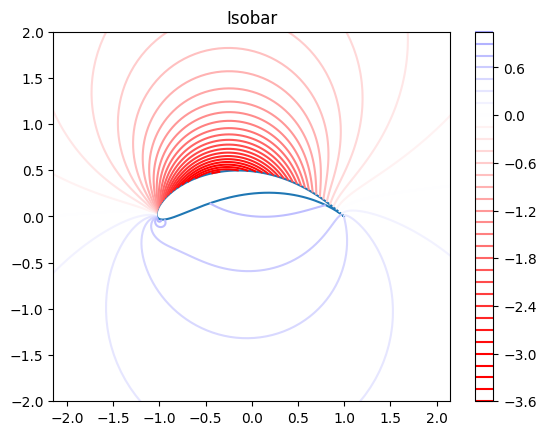

In [ ]:
#等圧線を出力
WingX = Xksi[0,:]
WingY = Yksi[0,:]
plt.plot(WingX,WingY)
plt.axis('equal')
plt.title("等圧線")

plt.contour(Xksi,Yksi,pressurematrix,30,linstyle="-",cmap='bwr_r',vmax=3,vmin=-3)
plt.colorbar()
plt.xlim(-2,2)
plt.ylim(-2,2)

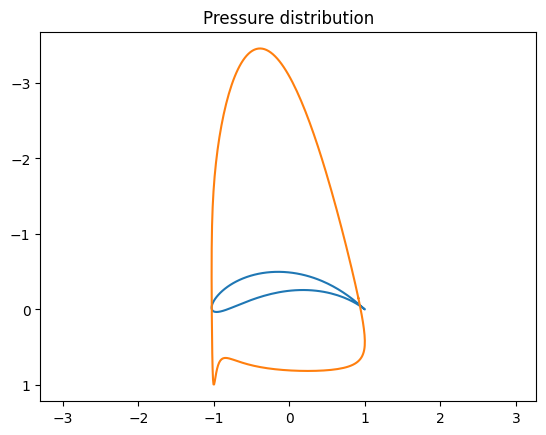

In [ ]:
#翼面上の圧力分布を求める
ax = plt.subplot()
ax.invert_yaxis()
ax.plot(WingX, -WingY)
ax.plot(WingX, pressurematrix[0,:])
plt.title("圧力分布")
plt.axis("equal")
plt.show()

In [ ]:
#揚力係数と抵抗係数を求める
C_x = 0
C_y = 0
A = 0
B = 0
for i in range(m-1):
  dnx = Xksi[0,i+1] - Xksi[0,i]
  dny = Yksi[0,i+1] - Yksi[0,i]
  Cp = (pressurematrix[0,i] + pressurematrix[0,i+1])/2
  C_x = C_x - Cp*dny
  C_y = C_y + Cp*dnx
  fx = -Cp*dny
  fy = Cp*dnx
  x = (Xksi[0,i+1] + Xksi[0,i])/2
  y = (Yksi[0,i+1] + Yksi[0,i])/2
  A = A + x*fy - y*fx
  B = B + fy

C_l = -C_x*np.sin(alp) + C_y*np.cos(alp)
C_d = C_x*np.cos(alp) + C_y*np.sin(alp)
x_cp = A/B

print("揚力係数",C_l/(4*c))
print("抵抗係数",C_d/(4*c))
print("風圧中心",(x_cp+2*c)/(4*c))
print("C_l,Kutta-Joukowski theorem=",gamma/(2*c*V))

-0.27763697946745053 3.1738418995403186
C_l= 3.1859621300632015
C_d= 3.806117839372236e-05
x_cp= 0.4341239541629984
C_l,Kutta-Joukowski theorem= 3.1864666232579273


(-1.0, 0.0)

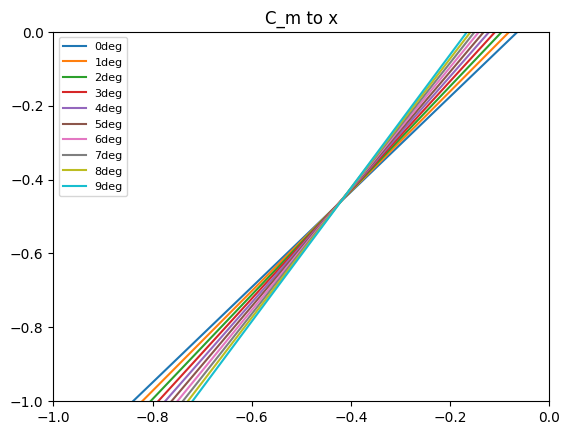

In [ ]:
#空力中心を求める(1)
#------------------------------------------------------------------
#alpを変数にして再定義
#------------------------------------------------------------------
x1 = np.zeros((n,m))
y1 = np.zeros((n,m))
Xksi1 = np.zeros((n,m))
Yksi1 = np.zeros((n,m))
streamlinematrix1 = np.zeros((n,m))
potentialmatrix1 = np.zeros((n,m))
pressurematrix1 = np.zeros((n,m))
Z_c = a*np.exp(1j*(np.pi - beta)) + c

def gamma1(alp0):
  return 4*np.pi*V*a*np.sin(alp0+beta)

def cgamma1(alp0):
  return (1j*gamma1(alp0))/(2*np.pi)

def potential1(z,alp0):
  return V*(z+a**2/z)+cgamma1(alp0)*np.log(z)

def Z1(z,alp0):
  return z*np.exp(1j*alp0)+Z_c

def dfdksi1(z,alp0):
  return V*np.exp(-1j*alp0)*(1-a**2/z**2+1j*4*np.pi*a*np.sin(alp0+beta)/(2*np.pi*z))/(1-c**2/Z1(z,alp0)**2)

def pressure1(z,alp):
  return 1-abs(dfdksi1(z,alp))**2/V**2

def ksi1(Z):
  return Z + c**2/Z

fig = plt.figure()
ax = fig.add_subplot(111)
l = 10
for alpa in range(l):
   WingX1 = Xksi1[0,:]
   C_x = 0
   C_y = 0
   A = 0
   B = 0
   S = np.zeros((m))
   for i in range(n):
     for k in range(m):
       theta0 = 0
       theta = theta0 + k*dtheta
       r = a + i*dr
       x1[i,k] = r*np.cos(theta)
       y1[i,k] = r*np.sin(theta)
       z = x1[i,k] + 1j*y1[i,k]
       potentialmatrix1[i,k] = np.real(potential1(z,alpa*deg))
       streamlinematrix1[i,k] = np.imag(potential1(z,alpa*deg))
       pressurematrix1[i,k] = pressure1(z,alpa*deg)
       Xksi1[i,k] = np.real(ksi1(Z1(z,alpa*deg)))
       Yksi1[i,k] = np.imag(ksi1(Z1(z,alpa*deg)))
   for s in range(m):
     A = 0
     x_0 = np.linspace(-1,1,m)
     for i in range(m-1):
       dnx = Xksi1[0,i+1] - Xksi1[0,i]
       dny = Yksi1[0,i+1] - Yksi1[0,i]
       Cp = (pressurematrix1[0,i] + pressurematrix1[0,i+1])/2
       fx = -Cp*dny
       fy = Cp*dnx
       x = (Xksi1[0,i+1] + Xksi1[0,i])/2
       y = (Yksi1[0,i+1] + Yksi1[0,i])/2
       A = A + (x_0[s] - x)*fy + y*fx
     S[s] = A/(4*c)**2
   ax.plot(x_0,S,label=str(alpa)+"deg")
hans, labs = ax.get_legend_handles_labels()
ax.legend(handles=hans, labels=labs, fontsize=8)
plt.title("空力中心")
plt.xlim([-1.0,0])
plt.ylim([-1.0,0])

In [ ]:
#空力中心を求める（2）
alpa1 = 0
alpa2 = 1
WingX1 = Xksi1[0,:]
C_x = 0
C_y = 0
A = 0
B = 0
S1 = np.zeros((m))
S2 = np.zeros((m))
for i in range(n):
  for k in range(m):
    theta0 = 0
    theta = theta0 + k*dtheta
    r = a + i*dr
    x1[i,k] = r*np.cos(theta)
    y1[i,k] = r*np.sin(theta)
    z = x1[i,k] + 1j*y1[i,k]
    potentialmatrix1[i,k] = np.real(potential1(z,alpa1*deg))
    streamlinematrix1[i,k] = np.imag(potential1(z,alpa1*deg))
    pressurematrix1[i,k] = pressure1(z,alpa1*deg)
    Xksi1[i,k] = np.real(ksi1(Z1(z,alpa1*deg)))
    Yksi1[i,k] = np.imag(ksi1(Z1(z,alpa1*deg)))
for s in range(m):
  A = 0
  x_0 = np.linspace(-1,1,m)
  for i in range(m-1):
    dnx = Xksi1[0,i+1] - Xksi1[0,i]
    dny = Yksi1[0,i+1] - Yksi1[0,i]
    Cp = (pressurematrix1[0,i] + pressurematrix1[0,i+1])/2
    fx = -Cp*dny
    fy = Cp*dnx
    x = (Xksi1[0,i+1] + Xksi1[0,i])/2
    y = (Yksi1[0,i+1] + Yksi1[0,i])/2
    A = A + (x_0[s] - x)*fy + y*fx
  S1[s] = A/(4*c)**2

for i in range(n):
  for k in range(m):
    theta0 = 0
    theta = theta0 + k*dtheta
    r = a + i*dr
    x1[i,k] = r*np.cos(theta)
    y1[i,k] = r*np.sin(theta)
    z = x1[i,k] + 1j*y1[i,k]
    potentialmatrix1[i,k] = np.real(potential1(z,alpa2*deg))
    streamlinematrix1[i,k] = np.imag(potential1(z,alpa2*deg))
    pressurematrix1[i,k] = pressure1(z,alpa2*deg)
    Xksi1[i,k] = np.real(ksi1(Z1(z,alpa2*deg)))
    Yksi1[i,k] = np.imag(ksi1(Z1(z,alpa2*deg)))
for s in range(m):
  A = 0
  x_0 = np.linspace(-1,1,m)
  for i in range(m-1):
    dnx = Xksi1[0,i+1] - Xksi1[0,i]
    dny = Yksi1[0,i+1] - Yksi1[0,i]
    Cp = (pressurematrix1[0,i] + pressurematrix1[0,i+1])/2
    fx = -Cp*dny
    fy = Cp*dnx
    x = (Xksi1[0,i+1] + Xksi1[0,i])/2
    y = (Yksi1[0,i+1] + Yksi1[0,i])/2
    A = A + (x_0[s] - x)*fy + y*fx
  S2[s] = A/(4*c)**2

S3 = np.zeros((m))
for i in range(m):
  S3[i] = abs(S1[i]-S2[i])

S3min = min(S3)
S4 = S3.tolist()
I = S4.index(S3min)
print((x_0[I]+2*c)/(4*c))

0.2833333333333333


In [ ]:
#空力中心を求める（2）
alpa1 = 1
alpa2 = 2
WingX1 = Xksi1[0,:]
C_x = 0
C_y = 0
A = 0
B = 0
S1 = np.zeros((m))
S2 = np.zeros((m))
for i in range(n):
  for k in range(m):
    theta0 = 0
    theta = theta0 + k*dtheta
    r = a + i*dr
    x1[i,k] = r*np.cos(theta)
    y1[i,k] = r*np.sin(theta)
    z = x1[i,k] + 1j*y1[i,k]
    potentialmatrix1[i,k] = np.real(potential1(z,alpa1*deg))
    streamlinematrix1[i,k] = np.imag(potential1(z,alpa1*deg))
    pressurematrix1[i,k] = pressure1(z,alpa1*deg)
    Xksi1[i,k] = np.real(ksi1(Z1(z,alpa1*deg)))
    Yksi1[i,k] = np.imag(ksi1(Z1(z,alpa1*deg)))
for s in range(m):
  A = 0
  x_0 = np.linspace(-1,1,m)
  for i in range(m-1):
    dnx = Xksi1[0,i+1] - Xksi1[0,i]
    dny = Yksi1[0,i+1] - Yksi1[0,i]
    Cp = (pressurematrix1[0,i] + pressurematrix1[0,i+1])/2
    fx = -Cp*dny
    fy = Cp*dnx
    x = (Xksi1[0,i+1] + Xksi1[0,i])/2
    y = (Yksi1[0,i+1] + Yksi1[0,i])/2
    A = A + (x_0[s] - x)*fy + y*fx
  S1[s] = A/(4*c)**2

for i in range(n):
  for k in range(m):
    theta0 = 0
    theta = theta0 + k*dtheta
    r = a + i*dr
    x1[i,k] = r*np.cos(theta)
    y1[i,k] = r*np.sin(theta)
    z = x1[i,k] + 1j*y1[i,k]
    potentialmatrix1[i,k] = np.real(potential1(z,alpa2*deg))
    streamlinematrix1[i,k] = np.imag(potential1(z,alpa2*deg))
    pressurematrix1[i,k] = pressure1(z,alpa2*deg)
    Xksi1[i,k] = np.real(ksi1(Z1(z,alpa2*deg)))
    Yksi1[i,k] = np.imag(ksi1(Z1(z,alpa2*deg)))
for s in range(m):
  A = 0
  x_0 = np.linspace(-1,1,m)
  for i in range(m-1):
    dnx = Xksi1[0,i+1] - Xksi1[0,i]
    dny = Yksi1[0,i+1] - Yksi1[0,i]
    Cp = (pressurematrix1[0,i] + pressurematrix1[0,i+1])/2
    fx = -Cp*dny
    fy = Cp*dnx
    x = (Xksi1[0,i+1] + Xksi1[0,i])/2
    y = (Yksi1[0,i+1] + Yksi1[0,i])/2
    A = A + (x_0[s] - x)*fy + y*fx
  S2[s] = A/(4*c)**2

S3 = np.zeros((m))
for i in range(m):
  S3[i] = abs(S1[i]-S2[i])

S3min = min(S3)
S4 = S3.tolist()
I = S4.index(S3min)
print((x_0[I]+2*c)/(4*c))

0.2833333333333333


In [ ]:
#空力中心を求める（3）;計算角度間隔を2degから1degに変更
m = 361
dtheta = (360/(m-1))*deg
x1 = np.zeros((n,m))
y1 = np.zeros((n,m))
Xksi1 = np.zeros((n,m))
Yksi1 = np.zeros((n,m))
streamlinematrix1 = np.zeros((n,m))
potentialmatrix1 = np.zeros((n,m))
pressurematrix1 = np.zeros((n,m))
Z_c = a*np.exp(1j*(np.pi - beta)) + c
alpa1 = 0
alpa2 = 1
WingX1 = Xksi1[0,:]
C_x = 0
C_y = 0
A = 0
B = 0
S1 = np.zeros((m))
S2 = np.zeros((m))
for i in range(n):
  for k in range(m):
    theta0 = 0
    theta = theta0 + k*dtheta
    r = a + i*dr
    x1[i,k] = r*np.cos(theta)
    y1[i,k] = r*np.sin(theta)
    z = x1[i,k] + 1j*y1[i,k]
    potentialmatrix1[i,k] = np.real(potential1(z,alpa1*deg))
    streamlinematrix1[i,k] = np.imag(potential1(z,alpa1*deg))
    pressurematrix1[i,k] = pressure1(z,alpa1*deg)
    Xksi1[i,k] = np.real(ksi1(Z1(z,alpa1*deg)))
    Yksi1[i,k] = np.imag(ksi1(Z1(z,alpa1*deg)))
for s in range(m):
  A = 0
  x_0 = np.linspace(-1,1,m)
  for i in range(m-1):
    dnx = Xksi1[0,i+1] - Xksi1[0,i]
    dny = Yksi1[0,i+1] - Yksi1[0,i]
    Cp = (pressurematrix1[0,i] + pressurematrix1[0,i+1])/2
    fx = -Cp*dny
    fy = Cp*dnx
    x = (Xksi1[0,i+1] + Xksi1[0,i])/2
    y = (Yksi1[0,i+1] + Yksi1[0,i])/2
    A = A + (x_0[s] - x)*fy + y*fx
  S1[s] = A/(4*c)**2

for i in range(n):
  for k in range(m):
    theta0 = 0
    theta = theta0 + k*dtheta
    r = a + i*dr
    x1[i,k] = r*np.cos(theta)
    y1[i,k] = r*np.sin(theta)
    z = x1[i,k] + 1j*y1[i,k]
    potentialmatrix1[i,k] = np.real(potential1(z,alpa2*deg))
    streamlinematrix1[i,k] = np.imag(potential1(z,alpa2*deg))
    pressurematrix1[i,k] = pressure1(z,alpa2*deg)
    Xksi1[i,k] = np.real(ksi1(Z1(z,alpa2*deg)))
    Yksi1[i,k] = np.imag(ksi1(Z1(z,alpa2*deg)))
for s in range(m):
  A = 0
  x_0 = np.linspace(-1,1,m)
  for i in range(m-1):
    dnx = Xksi1[0,i+1] - Xksi1[0,i]
    dny = Yksi1[0,i+1] - Yksi1[0,i]
    Cp = (pressurematrix1[0,i] + pressurematrix1[0,i+1])/2
    fx = -Cp*dny
    fy = Cp*dnx
    x = (Xksi1[0,i+1] + Xksi1[0,i])/2
    y = (Yksi1[0,i+1] + Yksi1[0,i])/2
    A = A + (x_0[s] - x)*fy + y*fx
  S2[s] = A/(4*c)**2

S3 = np.zeros((m))
for i in range(m):
  S3[i] = abs(S1[i]-S2[i])

S3min = min(S3)
S4 = S3.tolist()
I = S4.index(S3min)
print((x_0[I]+2*c)/(4*c))

0.2833333333333333


In [ ]:
#空力中心を求める（3）;計算角度間隔を2degから1degに変更
m = 361
dtheta = (360/(m-1))*deg
x1 = np.zeros((n,m))
y1 = np.zeros((n,m))
Xksi1 = np.zeros((n,m))
Yksi1 = np.zeros((n,m))
streamlinematrix1 = np.zeros((n,m))
potentialmatrix1 = np.zeros((n,m))
pressurematrix1 = np.zeros((n,m))
Z_c = a*np.exp(1j*(np.pi - beta)) + c
alpa1 = 1
alpa2 = 2
WingX1 = Xksi1[0,:]
C_x = 0
C_y = 0
A = 0
B = 0
S1 = np.zeros((m))
S2 = np.zeros((m))
for i in range(n):
  for k in range(m):
    theta0 = 0
    theta = theta0 + k*dtheta
    r = a + i*dr
    x1[i,k] = r*np.cos(theta)
    y1[i,k] = r*np.sin(theta)
    z = x1[i,k] + 1j*y1[i,k]
    potentialmatrix1[i,k] = np.real(potential1(z,alpa1*deg))
    streamlinematrix1[i,k] = np.imag(potential1(z,alpa1*deg))
    pressurematrix1[i,k] = pressure1(z,alpa1*deg)
    Xksi1[i,k] = np.real(ksi1(Z1(z,alpa1*deg)))
    Yksi1[i,k] = np.imag(ksi1(Z1(z,alpa1*deg)))
for s in range(m):
  A = 0
  x_0 = np.linspace(-1,1,m)
  for i in range(m-1):
    dnx = Xksi1[0,i+1] - Xksi1[0,i]
    dny = Yksi1[0,i+1] - Yksi1[0,i]
    Cp = (pressurematrix1[0,i] + pressurematrix1[0,i+1])/2
    fx = -Cp*dny
    fy = Cp*dnx
    x = (Xksi1[0,i+1] + Xksi1[0,i])/2
    y = (Yksi1[0,i+1] + Yksi1[0,i])/2
    A = A + (x_0[s] - x)*fy + y*fx
  S1[s] = A/(4*c)**2

for i in range(n):
  for k in range(m):
    theta0 = 0
    theta = theta0 + k*dtheta
    r = a + i*dr
    x1[i,k] = r*np.cos(theta)
    y1[i,k] = r*np.sin(theta)
    z = x1[i,k] + 1j*y1[i,k]
    potentialmatrix1[i,k] = np.real(potential1(z,alpa2*deg))
    streamlinematrix1[i,k] = np.imag(potential1(z,alpa2*deg))
    pressurematrix1[i,k] = pressure1(z,alpa2*deg)
    Xksi1[i,k] = np.real(ksi1(Z1(z,alpa2*deg)))
    Yksi1[i,k] = np.imag(ksi1(Z1(z,alpa2*deg)))
for s in range(m):
  A = 0
  x_0 = np.linspace(-1,1,m)
  for i in range(m-1):
    dnx = Xksi1[0,i+1] - Xksi1[0,i]
    dny = Yksi1[0,i+1] - Yksi1[0,i]
    Cp = (pressurematrix1[0,i] + pressurematrix1[0,i+1])/2
    fx = -Cp*dny
    fy = Cp*dnx
    x = (Xksi1[0,i+1] + Xksi1[0,i])/2
    y = (Yksi1[0,i+1] + Yksi1[0,i])/2
    A = A + (x_0[s] - x)*fy + y*fx
  S2[s] = A/(4*c)**2

S3 = np.zeros((m))
for i in range(m):
  S3[i] = abs(S1[i]-S2[i])

S3min = min(S3)
S4 = S3.tolist()
I = S4.index(S3min)
print((x_0[I]+2*c)/(4*c))

0.28611111111111115
